## ScalerMart: Data Analytics Case Study



In [267]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from scipy.stats import ttest_ind,chi2_contingency,f_oneway
from sklearn.impute import SimpleImputer
from scipy.stats import pearsonr
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler,StandardScaler

In [268]:
!wget "https://drive.google.com/uc?export=download&id=18bMEgCi24ZEh9SZ4mogvsXz5Inw-Jdwb" -O Customers.csv

--2025-05-26 13:09:44--  https://drive.google.com/uc?export=download&id=18bMEgCi24ZEh9SZ4mogvsXz5Inw-Jdwb
Resolving drive.google.com (drive.google.com)... 173.194.210.113, 173.194.210.100, 173.194.210.102, ...
Connecting to drive.google.com (drive.google.com)|173.194.210.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=18bMEgCi24ZEh9SZ4mogvsXz5Inw-Jdwb&export=download [following]
--2025-05-26 13:09:44--  https://drive.usercontent.google.com/download?id=18bMEgCi24ZEh9SZ4mogvsXz5Inw-Jdwb&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.134.132, 2607:f8b0:400c:c00::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.134.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1429215 (1.4M) [application/octet-stream]
Saving to: ‘Customers.csv’

Customers.csv       100%[===================>]   1.36M  --.-K

In [269]:
!pip install chardet
import chardet

with open("Customers.csv", "rb") as f:
    result = chardet.detect(f.read())
    print(result["encoding"])


Windows-1252


In [270]:
Customers = pd.read_csv("Customers.csv", encoding="Windows-1252")


In [271]:
!wget "https://drive.google.com/uc?export=download&id=1fT2UnVkW1UHesqIbUHrHMnCVVzk3JigZ" -O Sales.csv
!wget "https://drive.google.com/uc?export=download&id=11yb7zQMs1T5yYzcIhWbqFmi0i83ZxE8a" -O Products.csv

--2025-05-26 13:09:55--  https://drive.google.com/uc?export=download&id=1fT2UnVkW1UHesqIbUHrHMnCVVzk3JigZ
Resolving drive.google.com (drive.google.com)... 173.194.210.113, 173.194.210.100, 173.194.210.102, ...
Connecting to drive.google.com (drive.google.com)|173.194.210.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1fT2UnVkW1UHesqIbUHrHMnCVVzk3JigZ&export=download [following]
--2025-05-26 13:09:55--  https://drive.usercontent.google.com/download?id=1fT2UnVkW1UHesqIbUHrHMnCVVzk3JigZ&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.134.132, 2607:f8b0:400c:c00::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.134.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2799048 (2.7M) [application/octet-stream]
Saving to: ‘Sales.csv’

Sales.csv           100%[===================>]   2.67M  --.-KB/s 

In [272]:
Sales = pd.read_csv("Sales.csv")
Products=pd.read_csv("Products.csv")


# Data Exploration and Cleaning:

In [273]:
Customers.head()

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,7/3/1939
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,9/27/1979
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,5/26/1947
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,9/17/1957
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,11/19/1965


In [274]:
Sales.head()

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,1/1/2016,NaN,265598,10,1304,1,CAD
1,366001,1,1/1/2016,1/13/2016,1269051,0,1048,2,USD
2,366001,2,1/1/2016,1/13/2016,1269051,0,2007,1,USD
3,366002,1,1/1/2016,1/12/2016,266019,0,1106,7,CAD
4,366002,2,1/1/2016,1/12/2016,266019,0,373,1,CAD


In [275]:
Products.head()

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,$6.62,$12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,$7.40,$14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,$11.00,$21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,$11.00,$21.57,101,MP4&MP3,1,Audio


##EDA Customers


In [276]:

Customers.isna().sum()

,0
CustomerKey,0
Gender,0
Name,0
City,0
State Code,10
State,0
Zip Code,0
Country,0
Continent,0
Birthday,0


In [277]:
Customers.duplicated().value_counts()

,count
False,15266


In [278]:
Customers.describe(include='all')

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
count,1.526600e+04,15266,15266,15266,15256,15266,15266,15266,15266,15266
unique,NaN,2,15118,8258,467,512,9505,8,3,11270
top,NaN,Male,John Smith,Toronto,CA,California,90017,United States,North America,5/29/1965
freq,NaN,7748,4,204,740,715,70,6828,8381,5
mean,1.060508e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,6.127097e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,3.010000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,5.140335e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.079244e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.593980e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [279]:

null_state_rows = Customers[Customers["State Code"].isnull()]

# Display the rows where the "State Code" column is null
null_state_rows


,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
5304,729681,Female,Rossana Padovesi,Polvica,NaN,Napoli,80035,Italy,Europe,4/18/1981
5316,732289,Male,Indro Piccio,Varcaturo,NaN,Napoli,80014,Italy,Europe,2/24/1949
5372,742042,Male,Amaranto Loggia,Casaferro,NaN,Napoli,80034,Italy,Europe,3/14/1936
5377,742886,Female,Edmonda Capon,Terzigno,NaN,Napoli,80040,Italy,Europe,8/6/1963
5378,743343,Female,Ambra Sagese,Pomigliano D'Arco,NaN,Napoli,80038,Italy,Europe,1/5/1961
5485,759705,Male,Callisto Lo Duca,Casilli,NaN,Napoli,80047,Italy,Europe,8/28/1976
5525,765589,Male,Michelino Lucchesi,Pompei Scavi,NaN,Napoli,80045,Italy,Europe,11/13/1947
5531,766410,Male,Adelmio Beneventi,Licola,NaN,Napoli,80078,Italy,Europe,1/13/1940
5631,781667,Female,Ilda Manna,Napoli,NaN,Napoli,80134,Italy,Europe,5/8/1977
5695,789177,Male,Calogero Folliero,Mariglianella,NaN,Napoli,80030,Italy,Europe,3/3/2000


In [280]:
Customers['State Code']=Customers['State Code'].fillna("NA")

In [281]:
Customers.isna().sum()

,0
CustomerKey,0
Gender,0
Name,0
City,0
State Code,0
State,0
Zip Code,0
Country,0
Continent,0
Birthday,0


##EDA Products

In [282]:
Products.isna().sum()

,0
ProductKey,0
Product Name,0
Brand,0
Color,0
Unit Cost USD,0
Unit Price USD,0
SubcategoryKey,0
Subcategory,0
CategoryKey,0
Category,0


In [283]:
Products.duplicated().value_counts()

,count
False,2517


##EDA Sales

In [284]:
Sales.isna().sum()

,0
Order Number,0
Line Item,0
Order Date,0
Delivery Date,49719
CustomerKey,0
StoreKey,0
ProductKey,0
Quantity,0
Currency Code,0


In [285]:
Sales.describe(include='all')

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
count,6.288400e+04,62884.000000,62884,13165,6.288400e+04,62884.000000,62884.000000,62884.000000,62884
unique,NaN,NaN,1641,1492,NaN,NaN,NaN,NaN,5
top,NaN,NaN,12/21/2019,1/6/2020,NaN,NaN,NaN,NaN,USD
freq,NaN,NaN,222,50,NaN,NaN,NaN,NaN,33767
mean,1.430905e+06,2.164207,NaN,NaN,1.180797e+06,31.802144,1125.859344,3.144790,NaN
std,4.532963e+05,1.365170,NaN,NaN,5.859634e+05,22.978188,709.244010,2.256371,NaN
min,3.660000e+05,1.000000,NaN,NaN,3.010000e+02,0.000000,1.000000,1.000000,NaN
25%,1.121017e+06,1.000000,NaN,NaN,6.808580e+05,8.000000,437.000000,1.000000,NaN
50%,1.498016e+06,2.000000,NaN,NaN,1.261200e+06,37.000000,1358.000000,2.000000,NaN
75%,1.788010e+06,3.000000,NaN,NaN,1.686496e+06,53.000000,1650.000000,4.000000,NaN


In [286]:
Sales[Sales['Delivery Date'].isna()]

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,1/1/2016,NaN,265598,10,1304,1,CAD
6,366004,1,1/1/2016,NaN,1107461,38,163,6,GBP
7,366004,2,1/1/2016,NaN,1107461,38,1529,2,GBP
8,366005,1,1/1/2016,NaN,844003,33,421,4,EUR
9,366007,1,1/1/2016,NaN,2035771,43,1617,1,USD
...,...,...,...,...,...,...,...,...,...
62867,2243025,1,2/20/2021,NaN,1909290,49,1128,2,USD
62868,2243025,2,2/20/2021,NaN,1909290,49,2511,2,USD
62869,2243026,1,2/20/2021,NaN,1737466,49,58,6,USD
62872,2243028,1,2/20/2021,NaN,1728060,66,1584,3,USD


In [287]:
Sales['Delivery Date']=Sales['Delivery Date'].fillna('1/6/2020')

In [288]:
Sales.duplicated().value_counts()

,count
False,62884


In [289]:
Sales.isna().sum()

,0
Order Number,0
Line Item,0
Order Date,0
Delivery Date,0
CustomerKey,0
StoreKey,0
ProductKey,0
Quantity,0
Currency Code,0


In [290]:
Customers.dtypes

,0
CustomerKey,int64
Gender,object
Name,object
City,object
State Code,object
State,object
Zip Code,object
Country,object
Continent,object
Birthday,object


*2) How would you explore the distribution of customer demographics? What
visualization techniques would you employ?*


In [291]:
Customers

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,7/3/1939
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,9/27/1979
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,5/26/1947
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,9/17/1957
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,11/19/1965
...,...,...,...,...,...,...,...,...,...,...
15261,2099600,Female,Denisa Dušková,Houston,TX,Texas,77017,United States,North America,3/25/1936
15262,2099618,Male,Justin Solórzano,Mclean,VA,Virginia,22101,United States,North America,2/16/1992
15263,2099758,Male,Svend Petrussen,Wilmington,NC,North Carolina,28405,United States,North America,11/9/1937
15264,2099862,Female,Lorenza Rush,Riverside,CA,California,92501,United States,North America,10/12/1937


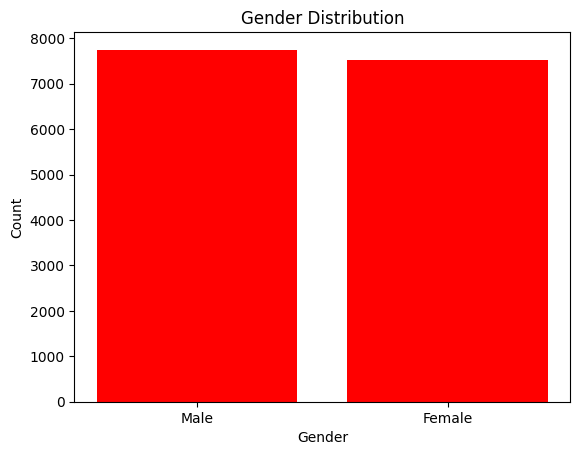

In [292]:
# Count the occurrences of each gender
gender_counts = Customers['Gender'].value_counts()

# Create a bar plot
plt.bar(gender_counts.index, gender_counts.values,color='red')

# Add labels and title
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender Distribution")

# Show the plot
plt.show()

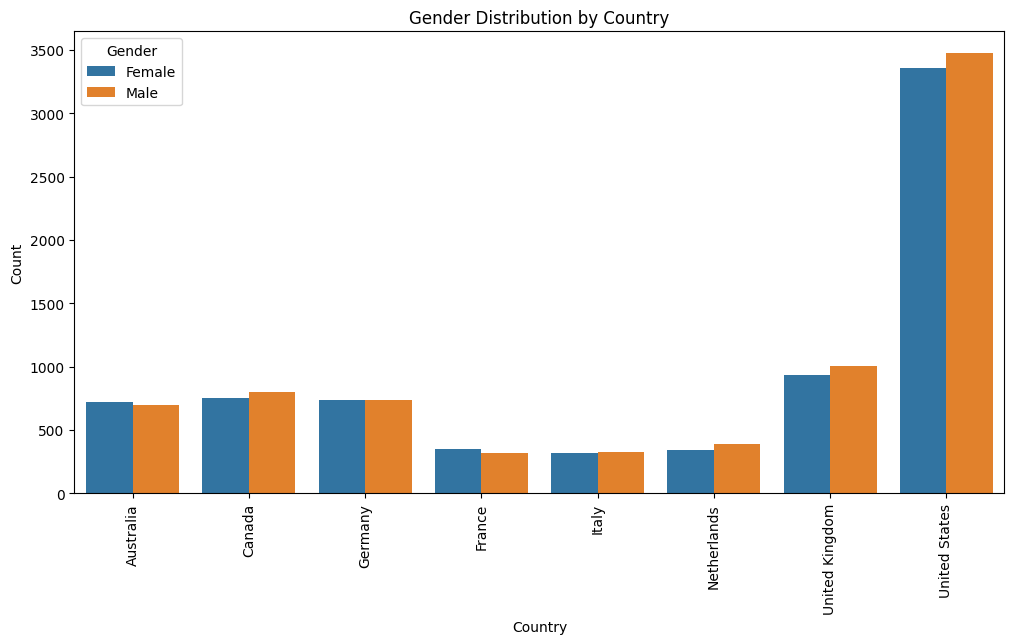

In [293]:
#Country vs gender

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a count plot
sns.countplot(data=Customers, x="Country", hue="Gender")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel("Country")
plt.ylabel("Count")
plt.title("Gender Distribution by Country")

# Show the plot
plt.show()

In [294]:
Country_Gender=pd.crosstab(index=Customers['Country'],columns=Customers['Gender'],margins=True,margins_name='Total')
Country_Gender

Gender,Female,Male,Total
Country,,,
Australia,721,699,1420
Canada,755,798,1553
France,351,319,670
Germany,734,739,1473
Italy,319,326,645
Netherlands,345,388,733
United Kingdom,938,1006,1944
United States,3355,3473,6828
Total,7518,7748,15266


In [295]:
Country_Gender_Norm=pd.crosstab(index=Customers['Country'],columns=Customers['Gender'],margins=True,margins_name='Total',normalize=True)*100
Country_Gender_Norm

Gender,Female,Male,Total
Country,,,
Australia,4.722914,4.578803,9.301716
Canada,4.945631,5.227303,10.172933
France,2.299227,2.089611,4.388838
Germany,4.808070,4.840823,9.648893
Italy,2.089611,2.135464,4.225075
Netherlands,2.259924,2.541596,4.801520
United Kingdom,6.144373,6.589807,12.734181
United States,21.976942,22.749902,44.726844
Total,49.246692,50.753308,100.000000


#2. User Segmentation:

*1) What customer segmentation techniques would you recommend to group
users with similar characteristics? Why is segmentation crucial for this
analysis?*

In [296]:
Sales['CustomerKey'].value_counts()


,count
CustomerKey,
723572,36
1925694,32
1579183,32
1972249,29
1492176,29
...,...
62590,1
289281,1
1592559,1


In [297]:
Sales['Currency Code'].value_counts()

,count
Currency Code,
USD,33767
EUR,12621
GBP,8140
CAD,5415
AUD,2941


In [298]:
Sales[Sales['CustomerKey']==723572]

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
1207,416015,1,2/20/2016,2/29/2016,723572,0,296,1,EUR
1208,416015,2,2/20/2016,2/29/2016,723572,0,424,7,EUR
1209,416015,3,2/20/2016,2/29/2016,723572,0,417,6,EUR
1210,416015,4,2/20/2016,2/29/2016,723572,0,146,2,EUR
7807,769008,1,2/7/2017,1/6/2020,723572,29,1287,5,EUR
7808,769008,2,2/7/2017,1/6/2020,723572,29,2084,2,EUR
7809,769008,3,2/7/2017,1/6/2020,723572,29,1481,2,EUR
8919,855011,1,5/4/2017,1/6/2020,723572,29,175,2,EUR
9380,877004,1,5/26/2017,1/6/2020,723572,28,2375,3,EUR
9381,877004,2,5/26/2017,1/6/2020,723572,28,1621,3,EUR


In [299]:
Sales_Cust_Qty = Sales.groupby("CustomerKey")["Quantity"].sum().reset_index()
Sales_Cust_Qty


,CustomerKey,Quantity
0,301,2
1,325,27
2,554,14
3,1042,6
4,1314,13
...,...,...
11882,2099383,23
11883,2099600,10
11884,2099758,9
11885,2099862,3


In [300]:
# Merge Customers and Sales data
customer_sales = pd.merge(Sales, Customers, on="CustomerKey", how="left")

# Merge with Products data
full_data = pd.merge(customer_sales, Products, on="ProductKey", how="left")

full_data


,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Gender,...,Birthday,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,366000,1,1/1/2016,1/6/2020,265598,10,1304,1,CAD,Male,...,3/23/1971,Contoso Lens Adapter M450 White,Contoso,White,$31.27,$68.00,406,Cameras & Camcorders Accessories,4,Cameras and camcorders
1,366001,1,1/1/2016,1/13/2016,1269051,0,1048,2,USD,Male,...,11/20/1995,A. Datum SLR Camera X136 Silver,A. Datum,Silver,$141.47,$427.00,402,Digital SLR Cameras,4,Cameras and camcorders
2,366001,2,1/1/2016,1/13/2016,1269051,0,2007,1,USD,Male,...,11/20/1995,Fabrikam Microwave 1.5CuFt X1100 Black,Fabrikam,Black,$220.64,$665.94,803,Microwaves,8,Home Appliances
3,366002,1,1/1/2016,1/12/2016,266019,0,1106,7,CAD,Female,...,8/24/1962,Contoso SLR Camera M146 Orange,Contoso,Orange,$148.08,$322.00,402,Digital SLR Cameras,4,Cameras and camcorders
4,366002,2,1/1/2016,1/12/2016,266019,0,373,1,CAD,Female,...,8/24/1962,Adventure Works Laptop8.9 E0890 White,Adventure Works,White,$166.20,$326.00,301,Laptops,3,Computers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62879,2243030,1,2/20/2021,1/6/2020,1216913,43,632,3,USD,Male,...,4/16/1939,WWI Screen 85in E1010 White,Wide World Importers,White,$70.87,$139.00,305,Projectors & Screens,3,Computers
62880,2243031,1,2/20/2021,2/24/2021,511229,0,98,4,EUR,Female,...,3/10/1940,WWI Wireless Bluetooth Stereo Headphones M170 ...,Wide World Importers,Silver,$55.18,$120.00,106,Bluetooth Headphones,1,Audio
62881,2243032,1,2/20/2021,2/23/2021,331277,0,1613,2,CAD,Male,...,5/25/1993,SV DVD 7-Inch Player Portable E200 White,Southridge Video,White,$56.08,$109.99,602,Movie DVD,6,"Music, Movies and Audio Books"
62882,2243032,2,2/20/2021,2/23/2021,331277,0,1717,2,CAD,Male,...,5/25/1993,MGS Flight Simulator X M250,Tailspin Toys,Pink,$32.25,$70.13,702,Download Games,7,Games and Toys


In [301]:
# Convert categorical columns individually
category_columns = ['Currency Code', 'Gender', 'Name', 'City', 'State Code', 'State', 'Country',
                    'Continent', 'Product Name', 'Brand', 'Color', 'Subcategory', 'Category']

for col in category_columns:
    full_data[col] = full_data[col].astype('category')  # Convert each column separately

# Verify changes
full_data.dtypes


,0
Order Number,int64
Line Item,int64
Order Date,object
Delivery Date,object
CustomerKey,int64
StoreKey,int64
ProductKey,int64
Quantity,int64
Currency Code,category
Gender,category


In [302]:
full_data['Delivery Date']=pd.to_datetime(full_data['Delivery Date'])

In [303]:
full_data.columns

Index(['Order Number', 'Line Item', 'Order Date', 'Delivery Date',
       'CustomerKey', 'StoreKey', 'ProductKey', 'Quantity', 'Currency Code',
       'Gender', 'Name', 'City', 'State Code', 'State', 'Zip Code', 'Country',
       'Continent', 'Birthday', 'Product Name', 'Brand', 'Color',
       'Unit Cost USD', 'Unit Price USD', 'SubcategoryKey', 'Subcategory',
       'CategoryKey', 'Category'],
      dtype='object')

In [304]:
full_data.dtypes

,0
Order Number,int64
Line Item,int64
Order Date,object
Delivery Date,datetime64[ns]
CustomerKey,int64
StoreKey,int64
ProductKey,int64
Quantity,int64
Currency Code,category
Gender,category


#Outlier Treatment

In [305]:
# List of numerical columns
numerical_cols = [
    'Order Number',
    'Line Item',
    'CustomerKey',
    'StoreKey',
    'ProductKey',
    'Quantity',
    #'Unit Price',
    'SubcategoryKey',
    'CategoryKey']

In [306]:
# Statistical summary of numerical columns
for col in numerical_cols:
    print(f"Statistics for {col}:")
    print(full_data[col].describe())
    print("\n")

Statistics for Order Number:
count    6.288400e+04
mean     1.430905e+06
std      4.532963e+05
min      3.660000e+05
25%      1.121017e+06
50%      1.498016e+06
75%      1.788010e+06
max      2.243032e+06
Name: Order Number, dtype: float64


Statistics for Line Item:
count    62884.000000
mean         2.164207
std          1.365170
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: Line Item, dtype: float64


Statistics for CustomerKey:
count    6.288400e+04
mean     1.180797e+06
std      5.859634e+05
min      3.010000e+02
25%      6.808580e+05
50%      1.261200e+06
75%      1.686496e+06
max      2.099937e+06
Name: CustomerKey, dtype: float64


Statistics for StoreKey:
count    62884.000000
mean        31.802144
std         22.978188
min          0.000000
25%          8.000000
50%         37.000000
75%         53.000000
max         66.000000
Name: StoreKey, dtype: float64


Statistics for ProductKey:
count    62884.000000

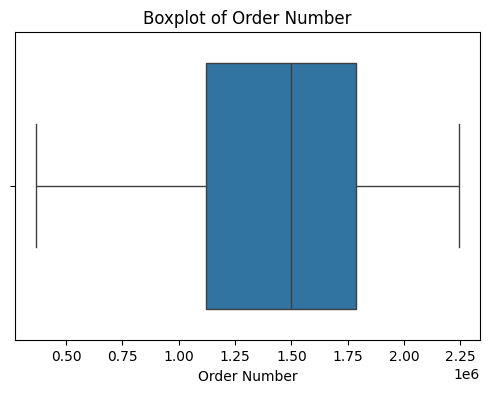

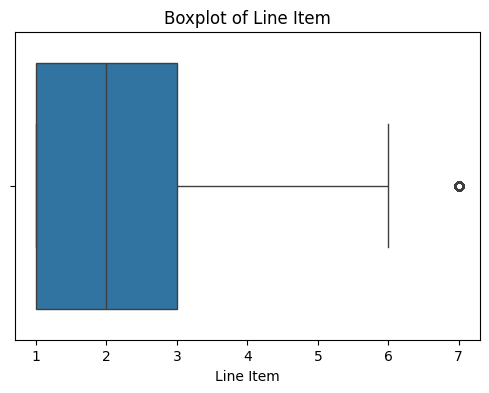

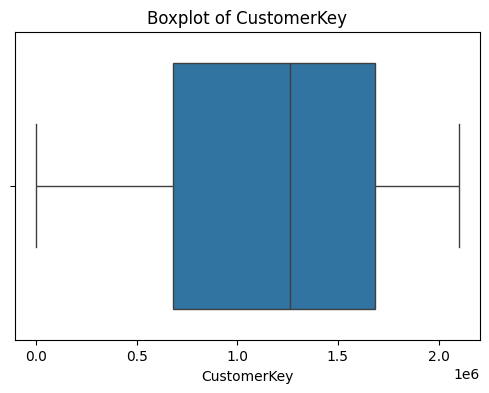

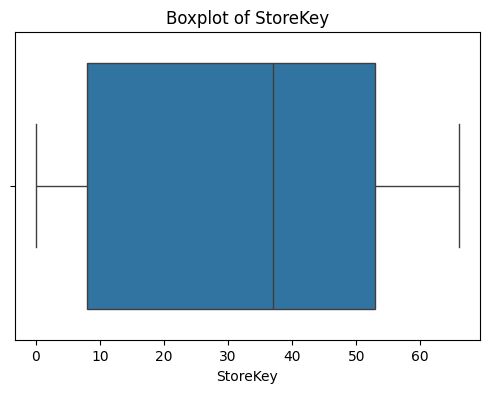

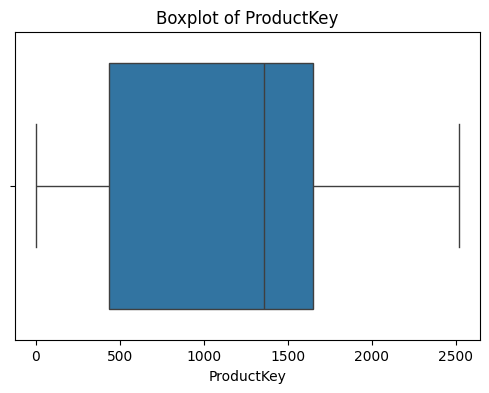

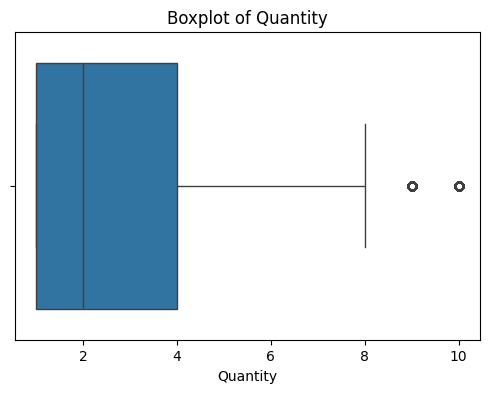

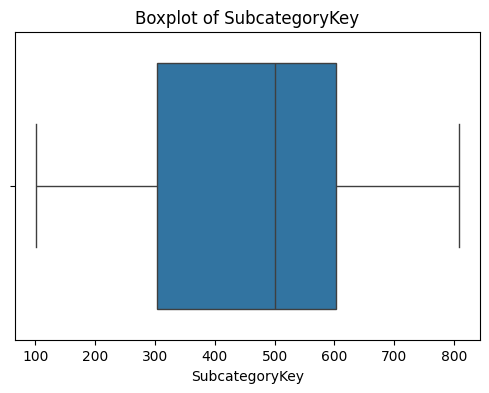

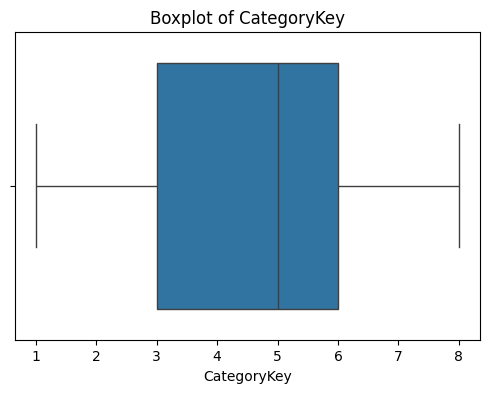

In [307]:

# Boxplots for numerical features
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=full_data[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


In [308]:
# Handle outliers using the IQR method
for col in numerical_cols:
    Q1 = full_data[col].quantile(0.25)  # First quartile (25th percentile)
    Q3 = full_data[col].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range

    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove rows with outliers
    full_data = full_data[(full_data[col] >= lower_bound) & (full_data[col] <= upper_bound)]

# Check cleaned dataset
print("Dataset after outlier treatment:")
full_data


Dataset after outlier treatment:


,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Gender,...,Birthday,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,366000,1,1/1/2016,2020-01-06,265598,10,1304,1,CAD,Male,...,3/23/1971,Contoso Lens Adapter M450 White,Contoso,White,$31.27,$68.00,406,Cameras & Camcorders Accessories,4,Cameras and camcorders
1,366001,1,1/1/2016,2016-01-13,1269051,0,1048,2,USD,Male,...,11/20/1995,A. Datum SLR Camera X136 Silver,A. Datum,Silver,$141.47,$427.00,402,Digital SLR Cameras,4,Cameras and camcorders
2,366001,2,1/1/2016,2016-01-13,1269051,0,2007,1,USD,Male,...,11/20/1995,Fabrikam Microwave 1.5CuFt X1100 Black,Fabrikam,Black,$220.64,$665.94,803,Microwaves,8,Home Appliances
3,366002,1,1/1/2016,2016-01-12,266019,0,1106,7,CAD,Female,...,8/24/1962,Contoso SLR Camera M146 Orange,Contoso,Orange,$148.08,$322.00,402,Digital SLR Cameras,4,Cameras and camcorders
4,366002,2,1/1/2016,2016-01-12,266019,0,373,1,CAD,Female,...,8/24/1962,Adventure Works Laptop8.9 E0890 White,Adventure Works,White,$166.20,$326.00,301,Laptops,3,Computers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62879,2243030,1,2/20/2021,2020-01-06,1216913,43,632,3,USD,Male,...,4/16/1939,WWI Screen 85in E1010 White,Wide World Importers,White,$70.87,$139.00,305,Projectors & Screens,3,Computers
62880,2243031,1,2/20/2021,2021-02-24,511229,0,98,4,EUR,Female,...,3/10/1940,WWI Wireless Bluetooth Stereo Headphones M170 ...,Wide World Importers,Silver,$55.18,$120.00,106,Bluetooth Headphones,1,Audio
62881,2243032,1,2/20/2021,2021-02-23,331277,0,1613,2,CAD,Male,...,5/25/1993,SV DVD 7-Inch Player Portable E200 White,Southridge Video,White,$56.08,$109.99,602,Movie DVD,6,"Music, Movies and Audio Books"
62882,2243032,2,2/20/2021,2021-02-23,331277,0,1717,2,CAD,Male,...,5/25/1993,MGS Flight Simulator X M250,Tailspin Toys,Pink,$32.25,$70.13,702,Download Games,7,Games and Toys


#Step 2: Segment Customers Based on Various Factors
1. Demographic Segmentation

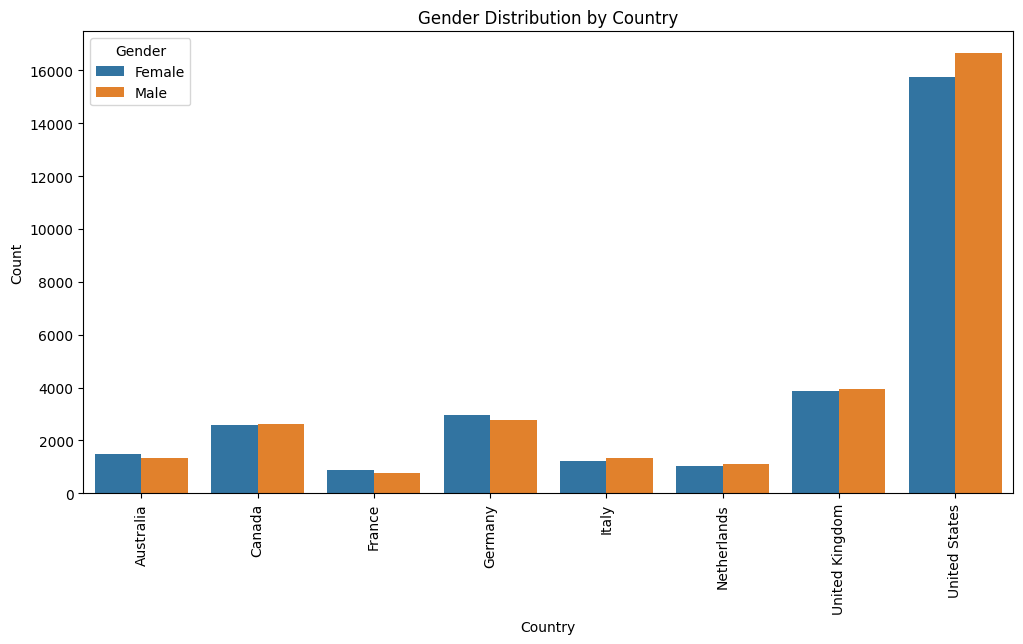

In [309]:
#Country vs gender

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a count plot
sns.countplot(data=full_data, x="Country", hue="Gender")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel("Country")
plt.ylabel("Count")
plt.title("Gender Distribution by Country")

# Show the plot
plt.show()

In [351]:
Country_Gender_f=pd.crosstab(index=full_data['Country'],columns=full_data['Gender'],margins=True,margins_name='Total')
Country_Gender_f

Gender,Female,Male,Total
Country,,,
Australia,1481,1337,2818
Canada,2602,2622,5224
France,891,780,1671
Germany,2951,2763,5714
Italy,1239,1332,2571
Netherlands,1028,1125,2153
United Kingdom,3867,3942,7809
United States,15743,16645,32388
Total,29802,30546,60348


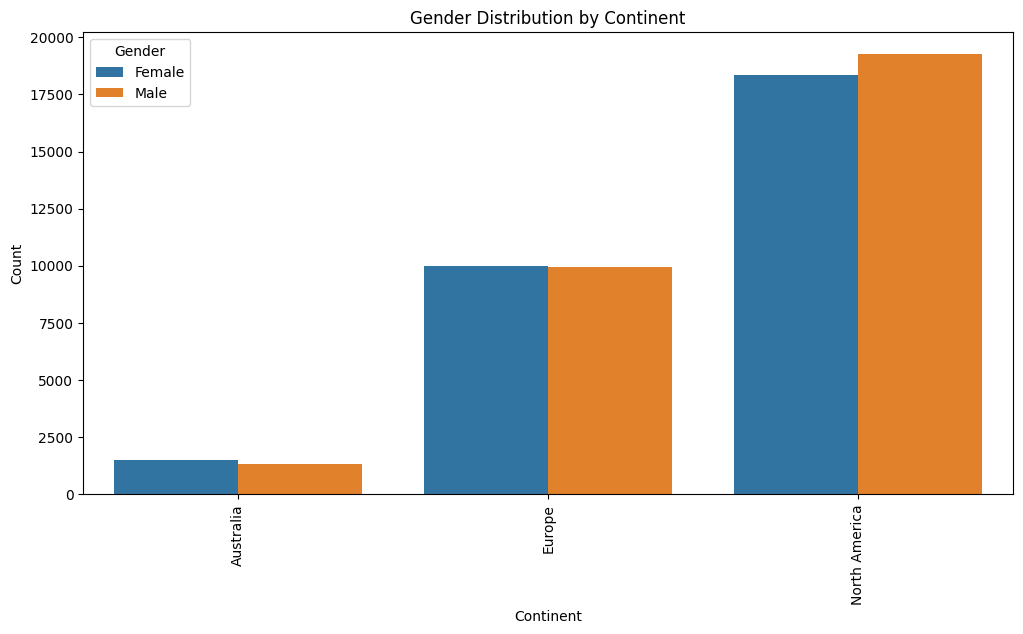

In [310]:
#Continent vs gender

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a count plot
sns.countplot(data=full_data, x="Continent", hue="Gender")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel("Continent")
plt.ylabel("Count")
plt.title("Gender Distribution by Continent")

# Show the plot
plt.show()

In [352]:
Continent_Gender_f=pd.crosstab(index=full_data['Continent'],columns=full_data['Gender'],margins=True,margins_name='Total')
Continent_Gender_f

Gender,Female,Male,Total
Continent,,,
Australia,1481,1337,2818
Europe,9976,9942,19918
North America,18345,19267,37612
Total,29802,30546,60348


2. Geographic Segmentation

In [311]:
geographic_segments = full_data.groupby(["Country", "State"]).size().reset_index(name="Count")
print(geographic_segments)


            Country          State  Count
0         Australia       Aberdeen      0
1         Australia  Aberdeenshire      0
2         Australia      Agrigento      0
3         Australia        Alabama      0
4         Australia         Alaska      0
...             ...            ...    ...
3923  United States           York      0
3924  United States          Yukon      0
3925  United States        Zeeland      0
3926  United States   Zuid-Holland      0
3927  United States  Île-de-France      0

[3928 rows x 3 columns]


3. Behavioral Segmentation (Purchase Behavior)

In [312]:
behavioral_segments = full_data.groupby("CustomerKey")["Quantity"].sum().reset_index()
behavioral_segments.rename(columns={"Quantity": "Total_Items_Purchased"}, inplace=True)
behavioral_segments


,CustomerKey,Total_Items_Purchased
0,301,2
1,325,27
2,554,14
3,1042,6
4,1314,13
...,...,...
11832,2099383,23
11833,2099600,10
11834,2099758,9
11835,2099862,3


In [359]:
behavioral_segments.sort_values(by='Total_Items_Purchased',ascending=False)

,CustomerKey,Total_Items_Purchased
3650,723572,115
10729,1925694,112
9558,1736139,91
7347,1388023,85
7565,1420237,85
...,...,...
5686,1111227,1
5707,1114873,1
3532,699820,1
8054,1499911,1


4. Spending-Based Segmentation

In [313]:
# Ensure 'Unit Price USD' is numeric (removing any non-numeric characters)
full_data["Unit Price USD"] = full_data["Unit Price USD"].replace('[\$,]', '', regex=True).astype(float)

# Perform the correct grouping and summing
spending_segments = full_data.groupby("CustomerKey")["Unit Price USD"].sum().reset_index()

# Rename column
spending_segments.rename(columns={"Unit Price USD": "TotalSpend"}, inplace=True)

# Display the result
spending_segments


,CustomerKey,TotalSpend
0,301,296.00
1,325,2215.89
2,554,353.88
3,1042,1043.94
4,1314,1737.94
...,...,...
11832,2099383,959.00
11833,2099600,408.96
11834,2099758,190.96
11835,2099862,501.50


In [361]:
spending_segments.sort_values(by='TotalSpend',ascending=False)

,CustomerKey,TotalSpend
5352,1049861,12749.87
9332,1702221,11687.13
8015,1492176,11437.64
5614,1098687,10936.12
7163,1360550,10658.47
...,...,...
2968,576913,3.35
6174,1203443,3.35
8089,1505785,3.35
731,187544,3.35


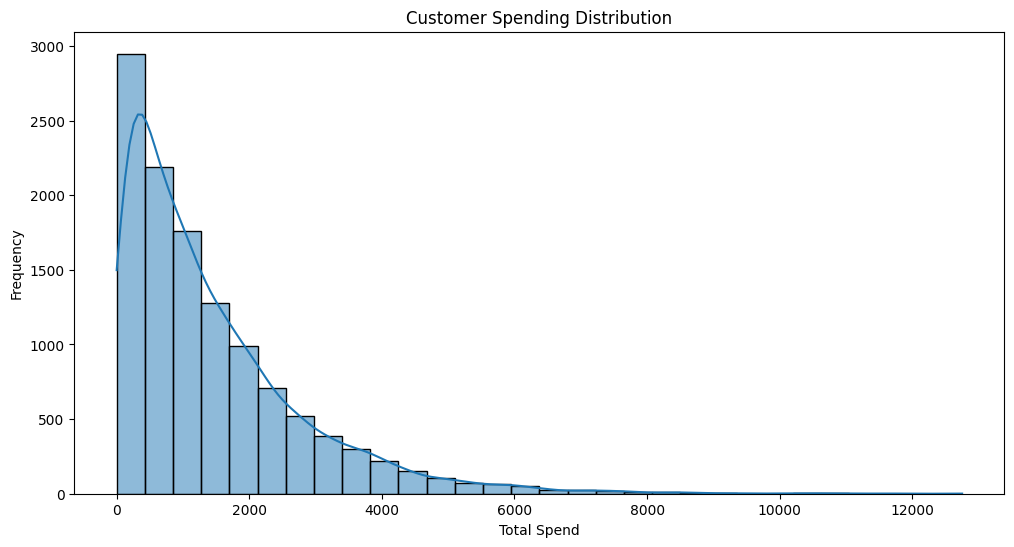

In [314]:
plt.figure(figsize=(12, 6))
sns.histplot(spending_segments["TotalSpend"],bins=30, kde=True)
plt.title("Customer Spending Distribution")
plt.xlabel("Total Spend")
plt.ylabel("Frequency")
plt.show()


#3. Engagement Analysis:

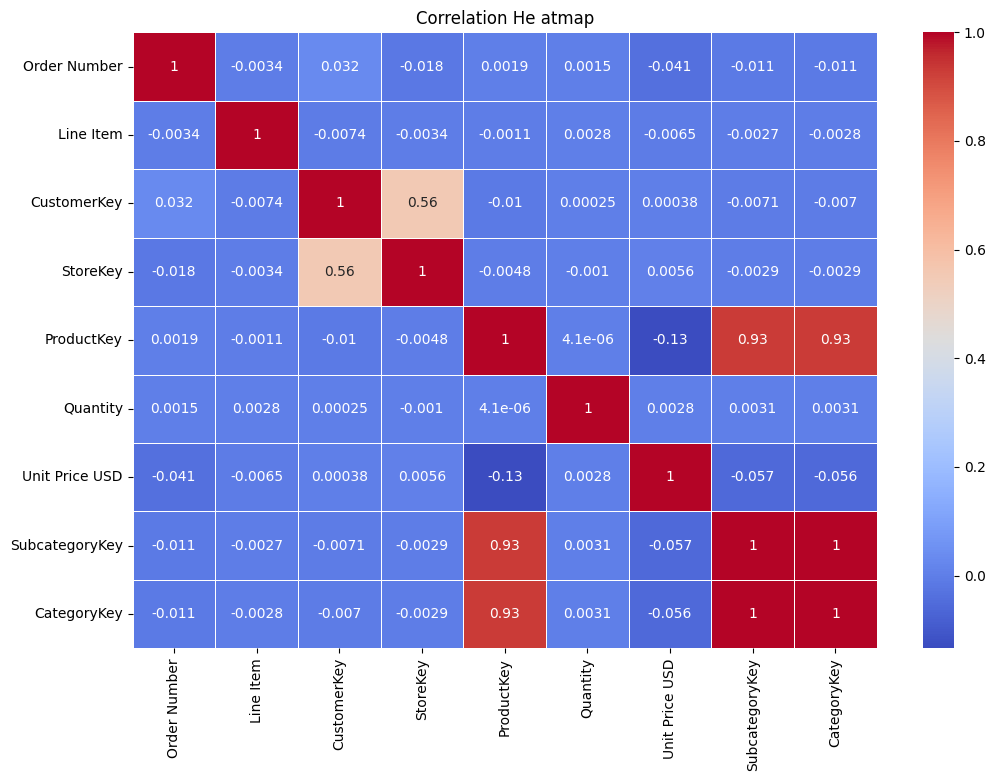

In [315]:
# Filter numerical columns
numerical_df = full_data.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix for numerical columns only
corr_matrix = numerical_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation He atmap')
plt.show()

In [316]:
# Generate insights from the correlation matrix
def generate_insights(corr_matrix):
    weak_negative_correlations = []
    weak_positive_correlations = []
    moderate_positive_correlations = []
    moderate_negative_correlations = []
    strong_positive_correlations = []
    strong_negative_correlations = []

    for col in corr_matrix.columns:
        for row in corr_matrix.index:
            if col != row:
                correlation = corr_matrix.loc[row, col]
                if -0.3 <= correlation <= 0:
                    weak_negative_correlations.append(f"Weak Negative correlation between {row} and {col}: {correlation:4f}")
                elif 0 < correlation <= 0.3:
                    weak_positive_correlations.append(f"Weak positive correlation between {row} and {col}: {correlation:4f}")
                elif 0.3 < correlation <= 0.7:
                    moderate_positive_correlations.append(f"Moderate positive correlation between {row} and {col}: {correlation:4f}")
                elif -0.7 <= correlation < -0.3:
                    moderate_negative_correlations.append(f"Moderate negative correlation between {row} and {col}: {correlation:4f}")
                elif correlation > 0.7:
                    strong_positive_correlations.append(f"Strong positive correlation between {row} and {col}: {correlation:4f}")
                elif correlation < -0.7:
                    strong_negative_correlations.append(f"Strong negative correlation between {row} and {col}: {correlation:4f}")

    return weak_negative_correlations,weak_positive_correlations, moderate_positive_correlations, moderate_negative_correlations, strong_positive_correlations, strong_negative_correlations

# Generate and print insights
weak_negative_correlations,weak_positive_correlations, moderate_positive_correlations, moderate_negative_correlations, strong_positive_correlations, strong_negative_correlations = generate_insights(corr_matrix)

print("🔍 INSIGHTS:\n")

print("Weak Positive Correlations:")
if weak_positive_correlations:
    for insight in weak_positive_correlations:
        print(insight)
else:
    print("There is no weak positive correlation")

print("Weak Negative Correlations:")
if weak_negative_correlations:
    for insight in weak_negative_correlations:
        print(insight)
else:
    print("There is no weak negative correlation")
print("\nModerate Positive Correlations:")
if moderate_positive_correlations:
    for insight in moderate_positive_correlations:
        print(insight)
else:
    print("There is no moderate positive correlation")

print("\nModerate Negative Correlations:")
if moderate_negative_correlations:
    for insight in moderate_negative_correlations:
        print(insight)
else:
    print("There is no moderate negative correlation")

print("\nStrong Positive Correlations:")
if strong_positive_correlations:
    for insight in strong_positive_correlations:
        print(insight)
else:
    print("There is no strong positive correlation")

print("\nStrong Negative Correlations:")
if strong_negative_correlations:
    for insight in strong_negative_correlations:
        print(insight)
else:
    print("There is no strong negative correlation")

🔍 INSIGHTS:

Weak Positive Correlations:
Weak positive correlation between CustomerKey and Order Number: 0.032195
Weak positive correlation between ProductKey and Order Number: 0.001871
Weak positive correlation between Quantity and Order Number: 0.001451
Weak positive correlation between Quantity and Line Item: 0.002798
Weak positive correlation between Order Number and CustomerKey: 0.032195
Weak positive correlation between Quantity and CustomerKey: 0.000248
Weak positive correlation between Unit Price USD and CustomerKey: 0.000384
Weak positive correlation between Unit Price USD and StoreKey: 0.005630
Weak positive correlation between Order Number and ProductKey: 0.001871
Weak positive correlation between Quantity and ProductKey: 0.000004
Weak positive correlation between Order Number and Quantity: 0.001451
Weak positive correlation between Line Item and Quantity: 0.002798
Weak positive correlation between CustomerKey and Quantity: 0.000248
Weak positive correlation between ProductK

*1)Stakeholders have noted that a substantial portion of the company's
revenue is attributed to repeat purchases from our loyal customer base.
Devise a metric to quantify customer loyalty and analyze trends over time?*


In [317]:
full_data

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Gender,...,Birthday,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,366000,1,1/1/2016,2020-01-06,265598,10,1304,1,CAD,Male,...,3/23/1971,Contoso Lens Adapter M450 White,Contoso,White,$31.27,68.00,406,Cameras & Camcorders Accessories,4,Cameras and camcorders
1,366001,1,1/1/2016,2016-01-13,1269051,0,1048,2,USD,Male,...,11/20/1995,A. Datum SLR Camera X136 Silver,A. Datum,Silver,$141.47,427.00,402,Digital SLR Cameras,4,Cameras and camcorders
2,366001,2,1/1/2016,2016-01-13,1269051,0,2007,1,USD,Male,...,11/20/1995,Fabrikam Microwave 1.5CuFt X1100 Black,Fabrikam,Black,$220.64,665.94,803,Microwaves,8,Home Appliances
3,366002,1,1/1/2016,2016-01-12,266019,0,1106,7,CAD,Female,...,8/24/1962,Contoso SLR Camera M146 Orange,Contoso,Orange,$148.08,322.00,402,Digital SLR Cameras,4,Cameras and camcorders
4,366002,2,1/1/2016,2016-01-12,266019,0,373,1,CAD,Female,...,8/24/1962,Adventure Works Laptop8.9 E0890 White,Adventure Works,White,$166.20,326.00,301,Laptops,3,Computers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62879,2243030,1,2/20/2021,2020-01-06,1216913,43,632,3,USD,Male,...,4/16/1939,WWI Screen 85in E1010 White,Wide World Importers,White,$70.87,139.00,305,Projectors & Screens,3,Computers
62880,2243031,1,2/20/2021,2021-02-24,511229,0,98,4,EUR,Female,...,3/10/1940,WWI Wireless Bluetooth Stereo Headphones M170 ...,Wide World Importers,Silver,$55.18,120.00,106,Bluetooth Headphones,1,Audio
62881,2243032,1,2/20/2021,2021-02-23,331277,0,1613,2,CAD,Male,...,5/25/1993,SV DVD 7-Inch Player Portable E200 White,Southridge Video,White,$56.08,109.99,602,Movie DVD,6,"Music, Movies and Audio Books"
62882,2243032,2,2/20/2021,2021-02-23,331277,0,1717,2,CAD,Male,...,5/25/1993,MGS Flight Simulator X M250,Tailspin Toys,Pink,$32.25,70.13,702,Download Games,7,Games and Toys


In [318]:
Cust_order_range_date=full_data.groupby('CustomerKey')['Order Date'].aggregate(['min','max']).reset_index()

In [319]:
Cust_order_range_date.dtypes

,0
CustomerKey,int64
min,object
max,object


In [320]:


# Convert dates to datetime format
Cust_order_range_date['min'] = pd.to_datetime(Cust_order_range_date['min'])
Cust_order_range_date['max'] = pd.to_datetime(Cust_order_range_date['max'])

# Ensure min is always the earliest date
Cust_order_range_date['min'], Cust_order_range_date['max'] = (
    Cust_order_range_date[['min', 'max']].min(axis=1),
    Cust_order_range_date[['min', 'max']].max(axis=1)
)

# Calculate frequency correctly
Cust_order_range_date['Frequency'] = Cust_order_range_date['max'] - Cust_order_range_date['min']

# Convert timedelta to days
Cust_order_range_date['Frequency'] = Cust_order_range_date['Frequency'].dt.days

Cust_order_range_date



,CustomerKey,min,max,Frequency
0,301,2019-11-11,2019-11-11,0
1,325,2018-01-13,2019-11-16,672
2,554,2018-01-04,2019-12-05,700
3,1042,2018-03-06,2018-03-06,0
4,1314,2017-12-19,2017-12-19,0
...,...,...,...,...
11832,2099383,2018-07-19,2020-02-06,567
11833,2099600,2018-08-08,2018-08-08,0
11834,2099758,2019-08-31,2020-06-10,284
11835,2099862,2020-01-01,2020-01-01,0


In [321]:
# Convert 'Order Date' to datetime format
full_data['Order Date'] = pd.to_datetime(full_data['Order Date'])

In [322]:
#Step 2: Define Customer Loyalty Metrics
#1. Repeat Purchase Rate (RPR)

# Count total customers and repeat customers
repeat_customers = full_data.groupby("CustomerKey")["Order Number"].nunique()
repeat_purchase_rate = (repeat_customers[repeat_customers > 1].count() / repeat_customers.count()) * 100

print(f"Repeat Purchase Rate: {repeat_purchase_rate:.2f}%")
repeat_customers


Repeat Purchase Rate: 60.78%


,Order Number
CustomerKey,
301,1
325,3
554,2
1042,1
1314,1
...,...
2099383,3
2099600,1
2099758,2


In [323]:
#2. Customer Lifetime Value (CLV)

# Calculate total spend per customer
customer_spend = full_data.groupby("CustomerKey")["Unit Price USD"].sum().reset_index()
customer_spend.rename(columns={"Unit Price USD": "TotalSpend"}, inplace=True)

# Estimate CLV (assuming avg lifespan of 5 years)
customer_spend["CLV"] = customer_spend["TotalSpend"] * 5

customer_spend



,CustomerKey,TotalSpend,CLV
0,301,296.00,1480.00
1,325,2215.89,11079.45
2,554,353.88,1769.40
3,1042,1043.94,5219.70
4,1314,1737.94,8689.70
...,...,...,...
11832,2099383,959.00,4795.00
11833,2099600,408.96,2044.80
11834,2099758,190.96,954.80
11835,2099862,501.50,2507.50


In [324]:
#3. Retention Rate Over Time

# Define retention rate formula
def retention_rate(df, start_date, end_date):
    start_customers = full_data[full_data["Order Date"] >= start_date]["CustomerKey"].nunique()
    end_customers = full_data[full_data["Order Date"] <= end_date]["CustomerKey"].nunique()
    return (end_customers / start_customers) * 100

# Example: Retention rate from 2023 to 2024
retention = retention_rate(full_data, "2016-01-01", "2021/01/01")
print(f"Retention Rate (2016-2021): {retention:.2f}%")

Retention Rate (2016-2021): 99.43%


In [325]:
full_data['Order Date'].max()

Timestamp('2021-02-20 00:00:00')

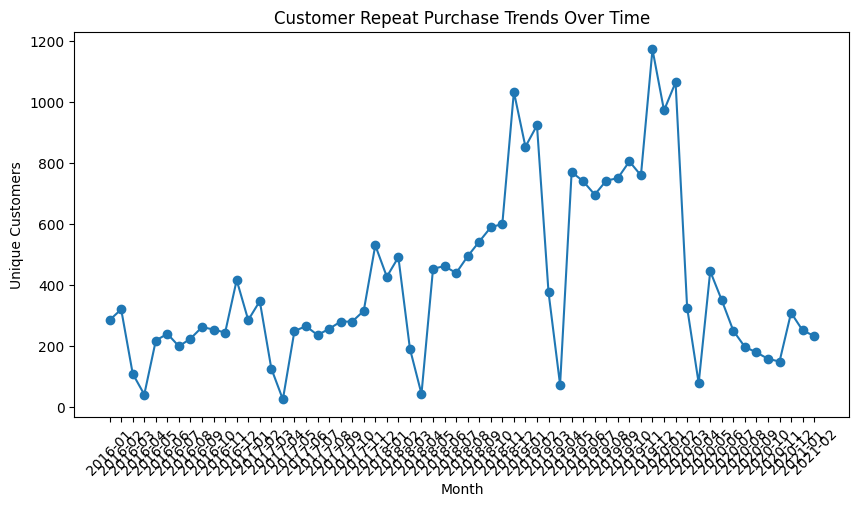

In [326]:
import matplotlib.pyplot as plt

# Monthly repeat purchase trends
monthly_purchases = full_data.groupby(full_data["Order Date"].dt.to_period("M"))["CustomerKey"].nunique()

plt.figure(figsize=(10, 5))
plt.plot(monthly_purchases.index.astype(str), monthly_purchases.values, marker="o")
plt.xlabel("Month")
plt.ylabel("Unique Customers")
plt.title("Customer Repeat Purchase Trends Over Time")
plt.xticks(rotation=45)
plt.show()


*2) Correlate user demographics with purchase behavior. Do you observe any
patterns? Formulate and test hypotheses to identify statistically significant
relationships.*

In [327]:
full_data

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Gender,...,Birthday,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,366000,1,2016-01-01,2020-01-06,265598,10,1304,1,CAD,Male,...,3/23/1971,Contoso Lens Adapter M450 White,Contoso,White,$31.27,68.00,406,Cameras & Camcorders Accessories,4,Cameras and camcorders
1,366001,1,2016-01-01,2016-01-13,1269051,0,1048,2,USD,Male,...,11/20/1995,A. Datum SLR Camera X136 Silver,A. Datum,Silver,$141.47,427.00,402,Digital SLR Cameras,4,Cameras and camcorders
2,366001,2,2016-01-01,2016-01-13,1269051,0,2007,1,USD,Male,...,11/20/1995,Fabrikam Microwave 1.5CuFt X1100 Black,Fabrikam,Black,$220.64,665.94,803,Microwaves,8,Home Appliances
3,366002,1,2016-01-01,2016-01-12,266019,0,1106,7,CAD,Female,...,8/24/1962,Contoso SLR Camera M146 Orange,Contoso,Orange,$148.08,322.00,402,Digital SLR Cameras,4,Cameras and camcorders
4,366002,2,2016-01-01,2016-01-12,266019,0,373,1,CAD,Female,...,8/24/1962,Adventure Works Laptop8.9 E0890 White,Adventure Works,White,$166.20,326.00,301,Laptops,3,Computers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62879,2243030,1,2021-02-20,2020-01-06,1216913,43,632,3,USD,Male,...,4/16/1939,WWI Screen 85in E1010 White,Wide World Importers,White,$70.87,139.00,305,Projectors & Screens,3,Computers
62880,2243031,1,2021-02-20,2021-02-24,511229,0,98,4,EUR,Female,...,3/10/1940,WWI Wireless Bluetooth Stereo Headphones M170 ...,Wide World Importers,Silver,$55.18,120.00,106,Bluetooth Headphones,1,Audio
62881,2243032,1,2021-02-20,2021-02-23,331277,0,1613,2,CAD,Male,...,5/25/1993,SV DVD 7-Inch Player Portable E200 White,Southridge Video,White,$56.08,109.99,602,Movie DVD,6,"Music, Movies and Audio Books"
62882,2243032,2,2021-02-20,2021-02-23,331277,0,1717,2,CAD,Male,...,5/25/1993,MGS Flight Simulator X M250,Tailspin Toys,Pink,$32.25,70.13,702,Download Games,7,Games and Toys


In [328]:
#1. Does gender influence spending behavior? (T-Test)
full_data_male=full_data[full_data['Gender']=='Male']['Unit Price USD']
full_data_female=full_data[full_data['Gender']=='Female']['Unit Price USD']

In [329]:
t_score,p_value=ttest_ind(full_data_male,full_data_female)
if p_value < 0.05:
  print("There is significance difference between Total Spending between male and female")
else:
  print("There is no significance difference between Total Spending between male and female")

There is no significance difference between Total Spending between male and female


In [330]:
#2. Does location impact purchase frequency? (Chi-Square Test)

Country_Frequency=full_data.groupby('Country')['Order Number'].count().reset_index()
Country_Frequency

,Country,Order Number
0,Australia,2818
1,Canada,5224
2,France,1671
3,Germany,5714
4,Italy,2571
5,Netherlands,2153
6,United Kingdom,7809
7,United States,32388


In [331]:
# Count total orders and unique customers
total_orders = full_data['Order Number'].nunique()
unique_customers = full_data['CustomerKey'].nunique()

# Compute purchase frequency
purchase_frequency = total_orders / unique_customers

print(f"Purchase Frequency: {purchase_frequency:.2f} orders per customer")


Purchase Frequency: 2.20 orders per customer


In [333]:
# Count total orders and unique customers
total_orders = full_data.groupby("CustomerKey")["Order Number"].nunique()

# Compute purchase frequency per customer
full_data["purchase_frequency"] = full_data["CustomerKey"].map(total_orders)

print(f"Average Purchase Frequency: {full_data['purchase_frequency'].mean():.2f} orders per customer")

# Create bins for purchase frequency (Categorical for Chi-Square)
full_data["purchase_bin"] = pd.cut(full_data["purchase_frequency"], bins=[0, 1, 3, 5, 10, float("inf")],
                                   labels=["1 Order", "2-3 Orders", "4-5 Orders", "6-10 Orders", "10+ Orders"])

# Create contingency table
contingency_table = pd.crosstab(full_data['Country'], full_data['purchase_bin'])

# Perform Chi-Square Test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Test p-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Statistically significant relationship: Country affects purchase frequency.")
else:
    print("No significant relationship found.")


Average Purchase Frequency: 3.07 orders per customer
Chi-Square Test p-value: 0.0
Statistically significant relationship: Country affects purchase frequency.


In [334]:
full_data

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Gender,...,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category,purchase_frequency,purchase_bin
0,366000,1,2016-01-01,2020-01-06,265598,10,1304,1,CAD,Male,...,Contoso,White,$31.27,68.00,406,Cameras & Camcorders Accessories,4,Cameras and camcorders,3,2-3 Orders
1,366001,1,2016-01-01,2016-01-13,1269051,0,1048,2,USD,Male,...,A. Datum,Silver,$141.47,427.00,402,Digital SLR Cameras,4,Cameras and camcorders,1,1 Order
2,366001,2,2016-01-01,2016-01-13,1269051,0,2007,1,USD,Male,...,Fabrikam,Black,$220.64,665.94,803,Microwaves,8,Home Appliances,1,1 Order
3,366002,1,2016-01-01,2016-01-12,266019,0,1106,7,CAD,Female,...,Contoso,Orange,$148.08,322.00,402,Digital SLR Cameras,4,Cameras and camcorders,2,2-3 Orders
4,366002,2,2016-01-01,2016-01-12,266019,0,373,1,CAD,Female,...,Adventure Works,White,$166.20,326.00,301,Laptops,3,Computers,2,2-3 Orders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62879,2243030,1,2021-02-20,2020-01-06,1216913,43,632,3,USD,Male,...,Wide World Importers,White,$70.87,139.00,305,Projectors & Screens,3,Computers,3,2-3 Orders
62880,2243031,1,2021-02-20,2021-02-24,511229,0,98,4,EUR,Female,...,Wide World Importers,Silver,$55.18,120.00,106,Bluetooth Headphones,1,Audio,2,2-3 Orders
62881,2243032,1,2021-02-20,2021-02-23,331277,0,1613,2,CAD,Male,...,Southridge Video,White,$56.08,109.99,602,Movie DVD,6,"Music, Movies and Audio Books",3,2-3 Orders
62882,2243032,2,2021-02-20,2021-02-23,331277,0,1717,2,CAD,Male,...,Tailspin Toys,Pink,$32.25,70.13,702,Download Games,7,Games and Toys,3,2-3 Orders


In [335]:
#Check Statistically significant relationship: Gender affects purchase Category.
# Create contingency table
contingency_table = pd.crosstab(full_data['Gender'], full_data['Category'])

# Perform Chi-Square Test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Test p-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Statistically significant relationship: Gender affects purchase Category.")
else:
    print("No significant relationship found.")


Chi-Square Test p-value: 0.03401854233275076
Statistically significant relationship: Gender affects purchase Category.


In [345]:
#Does Purchase Frequency correlate with Total Spend?

full_data [['purchase_frequency', 'Unit Price USD']].corr()


,purchase_frequency,Unit Price USD
purchase_frequency,1.000000,-0.001836
Unit Price USD,-0.001836,1.000000


- No linear relationship between them as value tends to be 0


# Actionable Takeaways:
✅ Market Expansion & Strategy

- The United States & North America dominate the customer base, meaning marketing efforts here should be prioritized.

- Consider analyzing spending trends by region to identify growth opportunities in underrepresented markets.

✅ Gender-Based Patterns

- Equal male-female distribution in major regions implies balanced marketing campaigns.

- However, since the female customer count is slightly lower overall, targeted promotions for female shoppers might enhance engagement.

✅ High-Value Customers

- Customers with 90+ purchases and top spenders ($12,749+) should be the focus of premium loyalty programs.

- Since high spenders may be less price-sensitive, exclusive offers and personalized recommendations could boost retention.

✅ Purchase Behavior Insights

- The statistically significant relationship between country and purchase frequency suggests localized shopping trends.

- Gender affects purchase category, meaning different product preferences exist—this insight can help refine inventory and personalized marketing.

#Overall Recommendations:

1️⃣ Customer Retention & Loyalty Programs:

✅ VIP Rewards for High-Value Customers

- Offer exclusive discounts or early product access to top spenders (e.g., CustomerKey: 1049861).

- Create personalized engagement plans based on their purchasing habits.

✅ Target Repeat Buyers (90+ Purchases)

- Since high-frequency purchasers exhibit strong brand loyalty, consider subscription models or tiered discounts.

- Personalized recommendations based on past purchases could enhance engagement.

2️⃣ Optimized Marketing Strategies

✅ Localized Promotions Based on Country & Continent Trends

- The United States and North America dominate the customer base, meaning priority marketing efforts should focus here.

- Countries with statistically significant purchase behavior (from Chi-Square tests) may need region-specific promotions.

✅ Gender-Specific Product Recommendations

- Since gender impacts purchase category preferences, personalized marketing could enhance conversion rates.

- A/B testing different ad creatives for male and female demographics might improve results.

3️⃣ Data-Driven Customer Insights

✅ Customer Segmentation for Predictive Models

- Use machine learning to cluster customers based on total spending, frequency, and demographics.

- Predict future high-value customers and proactively engage them with dynamic incentives.

✅ Behavioral Analysis to Improve Retention

- Why do some customers make only one purchase while others make 90+ transactions?

- Study factors like product selection, price sensitivity, and seasonal trends to refine product offerings.